In [4]:
! pip install konlpy wordcloud

     ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
     --------------------------------------- 0.0/19.4 MB 245.8 kB/s eta 0:01:19
     --------------------------------------- 0.1/19.4 MB 658.7 kB/s eta 0:00:30
      --------------------------------------- 0.3/19.4 MB 1.4 MB/s eta 0:00:14
      --------------------------------------- 0.4/19.4 MB 1.5 MB/s eta 0:00:13
     - -------------------------------------- 0.7/19.4 MB 2.1 MB/s eta 0:00:09
     - -------------------------------------- 0.9/19.4 MB 2.5 MB/s eta 0:00:08
     -- ------------------------------------- 1.1/19.4 MB 2.7 MB/s eta 0:00:07
     -- ------------------------------------- 1.3/19.4 MB 2.9 MB/s eta 0:00:07
     --- ------------------------------------ 1.6/19.4 MB 3.2 MB/s eta 0:00:06
     --- ------------------------------------ 1.8/19.4 MB 3.4 MB/s eta 

가져온 뉴스의 해드라인은 20개 입니다
1 기사 제목: 뉴욕증시, 연준 기준금리 결정 앞두고 혼조세 출발
링크: https://v.daum.net/v/20230920232858879
2 기사 제목: 러 "北과 모든 분야서 협력할 것"
링크: https://v.daum.net/v/20230920205625880
3 기사 제목: 지역단위 인증제로 친환경 도시 만든다…오세훈 "용산지구 첫 시범"
링크: https://v.daum.net/v/20230920195845769
4 기사 제목: 獨 최대 은행의 경고, "구조적 변화 없으면 '유럽의 병자' 못 벗어나"
링크: https://v.daum.net/v/20230920222443254
5 기사 제목: ‘6년간 셋방살이’에 이승엽도 반발…서울시 “최적의 잠실 대체구장 마련”
링크: https://v.daum.net/v/20230920175042820
6 기사 제목: [심층] 현수막에 떡하니 적혀 있는 '국내산', 사실은?
링크: https://v.daum.net/v/20230920180750554
7 기사 제목: MBC 제3노조 "권태선, 명백한 사규 위반에도 MBC 보도국 자체조사 용인"
링크: https://v.daum.net/v/20230920165845023
8 기사 제목: 울진 평해 128.5㎜ '물폭탄'…대구·경북 곳곳 강한 비
링크: https://v.daum.net/v/20230920223700332
9 기사 제목: 인도, 외교갈등 캐나다 내 자국민에 여행주의보 발령
링크: https://v.daum.net/v/20230920225220485
10 기사 제목: "일본산, 안 먹어"…中 수입금지에 '직격탄' 맞은 日
링크: https://v.daum.net/v/20230920203953519
11 기사 제목: 인사청문회 이틀째 가족 의혹 계속…"공정한 재판은 사명"
링크: https://v.daum.net/v/20230920192248100
12 기사 제목: 사무소 열고 현수막 걸고‥최승재·이용호·조정훈 

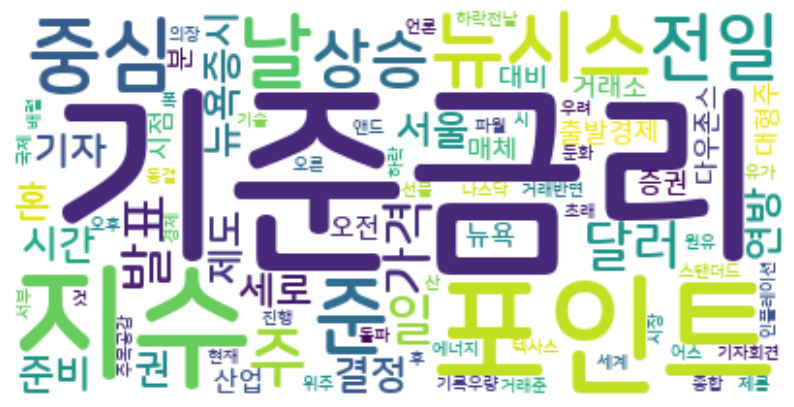

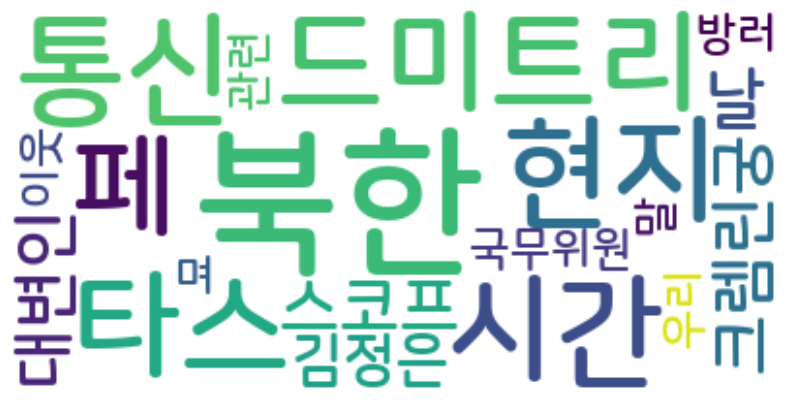

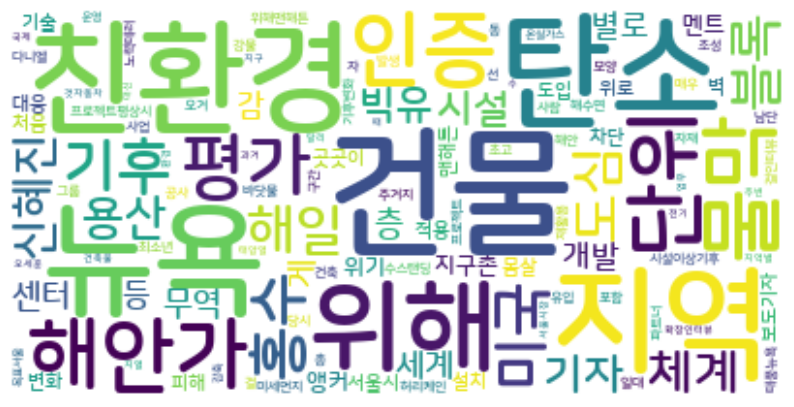

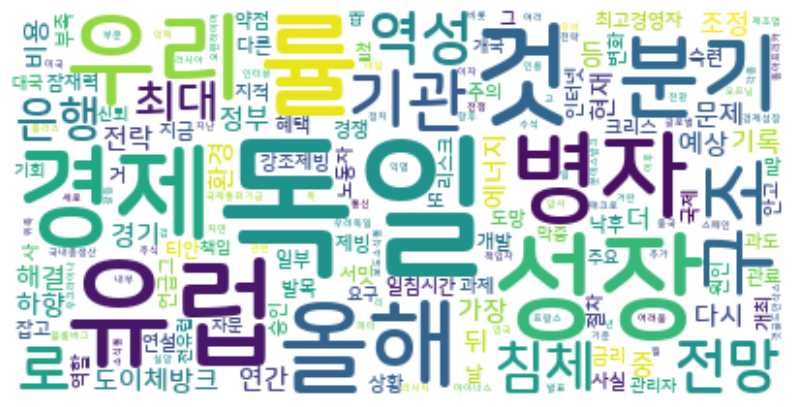

KeyboardInterrupt: 

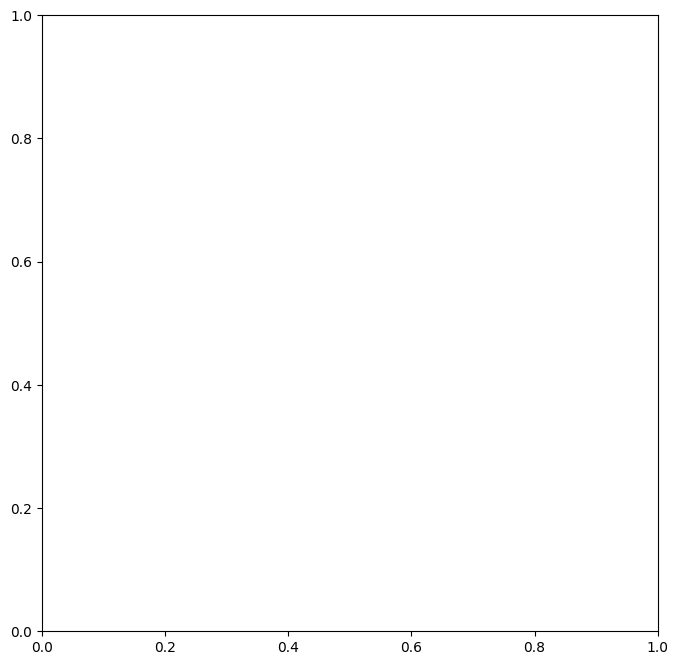

In [5]:


import requests
from bs4 import BeautifulSoup
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


url = "https://news.daum.net/"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"}

html = requests.get(url, headers=headers)
soup = BeautifulSoup(html.content, 'html.parser')
news_block = soup.find(class_="box_g box_news_issue")
news_main = news_block.find_all(class_="tit_g")

news_block_len = len(news_main)

news_content_link = []
news_content_headline = []

for i in range(news_block_len):
    link_element = news_main[i].find('a', class_='link_txt')
    if link_element and 'href' in link_element.attrs:
        news_content_link.append(link_element['href'])
    else:
        news_content_link.append("N/A")  
        
    # 기사 제목을 추출합니다.
    headline_element = news_main[i].find('a')
    if headline_element:
        news_content_headline.append(headline_element.text)
    else:
        news_content_headline.append("N/A")
        # 기사 제목을 찾을 수 없는 경우 처리

cleaned_data = []
for item in news_content_headline:
    # 공백 제거 및 제목 부분 추출
    cleaned_item = re.sub(r'\n\s*', '', item.strip())
    cleaned_data.append(cleaned_item)

# 가져온 내용 출력
print(f'가져온 뉴스의 해드라인은 {news_block_len}개 입니다')
for i in range(news_block_len):
    print(f"{i+1} 기사 제목: {cleaned_data[i]}")
    print(f"링크: {news_content_link[i]}")





for selected_news_link in news_content_link:
    # 선택한 뉴스 링크의 내용을 가져옵니다
    html = requests.get(selected_news_link, headers=headers)
    soup = BeautifulSoup(html.content, 'html.parser')

    # 뉴스 기사의 텍스트 내용을 추출하고 처리합니다
    news_text = ""
    for p in soup.find_all('p', {'dmcf-ptype': 'general'}):
        extracted_text = p.get_text()

        # 특수 문자와 숫자를 제거하는 정규 표현식
        text_data = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣\s]", "", extracted_text)

        # 형태소 분석하고 불용어를 제거합니다
        okt = Okt()
        tokens = okt.nouns(text_data)
        stopwords = ["을", "를", "이", "가", "은", "는", "의"]
        filtered_tokens = [word for word in tokens if word not in stopwords]

        # 필터링된 토큰을 합쳐서 뉴스 텍스트를 생성합니다
        news_text += " ".join(filtered_tokens)

    # 뉴스 텍스트에서 워드 클라우드를 생성합니다
    word_counts = Counter(news_text.split())
    wordcloud = WordCloud(font_path="font.ttf", background_color='white').generate_from_frequencies(word_counts)

    # 워드 클라우드를 화면에 표시합니다
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()



















 